In [ ]:
!pip uninstall wandb -y
!pip install ultralytics

!curl -L "https://universe.roboflow.com/ds/Ecrnngd8ud?key=uXw9F0o1QQ" > roboflow.zip
!unzip -q roboflow.zip
!rm roboflow.zip

Found existing installation: wandb 0.18.7
Uninstalling wandb-0.18.7:
  Successfully uninstalled wandb-0.18.7
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 16.9 MB/s eta 0:00:00
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   903  100   903    0     0   2984      0 --:--:-- --:--:-- --:--:--  2990
100 46.6M  100 46.6M    0     0  18.2M      0  0:00:02  0:00:02 --:--:-- 22.7M


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ultralytics
from ultralytics import YOLO
model = YOLO('./drive/MyDrive/model_training_01/E09_8n_e150_640_b16_SGD/weights/best.pt')
source ='./drive/MyDrive/text_recognition/table_image1.png'
result = model.predict(source, save=True)
cls = result[0].boxes.cls.cpu().numpy()
xyxy = result[0].boxes.xyxy.cpu().numpy()
conf =result[0].boxes.conf.cpu().numpy()
import cv2

print(xyxy)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 20.6 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 /content/drive/MyDrive/text_recognition/table_image1.png: 608x640 1 borderless, 92 cells, 55.2ms
Speed: 16.2ms preprocess, 55.2ms inference, 825.5ms postprocess per image at shape (1, 3, 608, 640)
Results saved to runs/detect/predict
[[     298.26      458.85        1582       959.3]
 [     708.61      767.97      741.84      785.54]
 [     845.17      666.47      1119.8       700.9]
 [     1443.6      580.97      1505.3       609.1]
 [     866.02      385.98      1103.4      417.99]
 [     1408.7      245.19      1543.7      278.45]
 [     1237.7      579.77      1290.7      608.81]
 [    

In [3]:
def find_tables(bounding_boxes_cls, bounding_boxes_xyxy, bounding_boxes_conf):
  tables_xyxy =[]
  tables_conf = []
  for index,_  in enumerate(bounding_boxes_cls):
    if bounding_boxes_cls [index]<2:
      tables_xyxy.append(bounding_boxes_xyxy[index])
      tables_conf.append(bounding_boxes_conf[index])

  return tables_xyxy, tables_conf

tables_xyxy, tables_conf = find_tables(cls,xyxy,conf)

print( tables_xyxy, tables_conf )


[array([     298.26,      458.85,        1582,       959.3], dtype=float32)] [0.9034613]


In [5]:
# cells_xyxy_for_each_table = []
# for table in tables_xyxy:
#   cells_xyxy_for_each_table.append(find_cells_inside_table(table, cls, xyxy))

# def find_cells_inside_table(table, cls,xyxy):
#   cells_inside_table_xyxy =[]
#   for i, _ in enumerate(xyxy):
#     if cls[i]<2:
#       continue
#     if is_inside_the_table(table, xyxy[i]):
#       cells_inside_table_xyxy.append(xyxy[i])
#   return cells_inside_table_xyxy

def is_inside_the_table(table, xyxy):
  cell_middle_x = (xyxy[0]+xyxy[2])/2.0
  cell_middle_y = (xyxy[1]+xyxy[3])/2.0
  if (table[0] < cell_middle_x < table[2]) and (table[1] < cell_middle_y < table[3]):
    return True
  return False


In [6]:
# cells_xyxy_for_each_table = []
# for table in tables_xyxy:
#   cells_xyxy_for_each_table.append(find_cells_inside_table(table, cls, xyxy))

def find_cells_inside_table(table, cls,xyxy):
  cells_inside_table_xyxy =[]
  for i, _ in enumerate(xyxy):
    if cls[i]<2:
      continue
    if is_inside_the_table(table, xyxy[i]):
      cells_inside_table_xyxy.append(xyxy[i])
  return cells_inside_table_xyxy

# def is_inside_the_table(table, xyxy):
#   cell_middle_x = (xyxy[0]+xyxy[2])/2.0
#   cell_middle_y = (xyxy[1]+xyxy[3])/2.0
#   if (table[0] < cell_middle_x < table[2]) and (table[1] < cell_middle_y < table[3]):
#     return True
#   return False

In [7]:
cells_xyxy_for_each_table = []
for table in tables_xyxy:
  cells_xyxy_for_each_table.append(find_cells_inside_table(table, cls, xyxy))

# def find_cells_inside_table(table, cls,xyxy):
#   cells_inside_table_xyxy =[]
#   for i, _ in enumerate(xyxy):
#     if cls[i]<2:
#       continue
#     if is_inside_the_table(table, xyxy[i]):
#       cells_inside_table_xyxy.append(xyxy[i])
#   return cells_inside_table_xyxy

# def is_inside_the_table(table, xyxy):
#   cell_middle_x = (xyxy[0]+xyxy[2])/2.0
#   cell_middle_y = (xyxy[1]+xyxy[3])/2.0
#   if (table[0] < cell_middle_x < table[2]) and (table[1] < cell_middle_y < table[3]):
#     return True
#   return False

In [8]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 26.7 MB/s eta 0:00:00


In [12]:
import  cv2
import matplotlib.pyplot as plt
img = cv2.imread('./drive/MyDrive/text_recognition/table_image1.png')
index_table=0
print(tables_xyxy)
table00_img = tables_xyxy[index_table].astype(int)
cells_for_table00= cells_xyxy_for_each_table[index_table]
cells_for_table00 =[x.astype(int) for x in cells_for_table00]
img[table00_img[1]:table00_img[3], table00_img[0]:table00_img[2]]



[array([     298.26,      458.85,        1582,       959.3], dtype=float32)]


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [17]:
!pip install easyocr
import easyocr
reader = easyocr.Reader(['en']) # this needs to run only once to load the model into memory
ocr_results = reader.readtext(img[table00_img[1]:table00_img[3], table00_img[0]:table00_img[2]]) # za da se opfati cela tabela mozhebi treba da se dodavaat brojki

In [18]:
ocr_results


[([[39, 0], [431, 0], [431, 19], [39, 19]],
  'uutuliun epen iinieiild Julluwv',
  0.03737717020938691),
 ([[439, 0], [523, 0], [523, 14], [439, 14]], 'ucluvv', 0.14053478553449084),
 ([[38, 35], [317, 35], [317, 74], [38, 74]],
  'RPN+ZF; unshared',
  0.657986669888372),
 ([[406, 40], [450, 40], [450, 70], [406, 70]], '2k', 0.9959220346763706),
 ([[546, 35], [825, 35], [825, 74], [546, 74]],
  'RPN+ZF; unshared',
  0.6734678986567995),
 ([[939, 37], [1001, 37], [1001, 73], [939, 73]], '300', 0.9999584295044541),
 ([[1146, 38], [1210, 38], [1210, 70], [1146, 70]],
  '58.7',
  0.7195290288453109),
 ([[154, 84], [200, 84], [200, 116], [154, 116]], 'SS', 0.9442968189197061),
 ([[408, 84], [450, 84], [450, 116], [408, 116]], '2k', 0.9439390835376593),
 ([[620, 84], [752, 84], [752, 116], [620, 116]],
  'RPN+ZF',
  0.9988290641341913),
 ([[942, 84], [1000, 84], [1000, 116], [942, 116]], '100', 0.9998379176711144),
 ([[1146, 84], [1212, 84], [1212, 116], [1146, 116]],
  '55.1',
  0.602544898

In [ ]:
# !pip uninstall tensorflow -y


In [ ]:
# !pip install python-doctr


In [ ]:
# from doctr.io import DocumentFile
# from doctr.models import ocr_predictor

# model = ocr_predictor(pretrained=True)
# # PDF
# cv2.imwrite('tabela_1.png',img[table00_img[1]:table00_img[3], table00_img[0]:table00_img[2]])
# doc = DocumentFile.from_images('tabela_1.png')
# # Analyze
# result = model(doc)

In [ ]:
# result

In [ ]:
# !pip install mplcursors
# !pip install matplotlib
# !pip install python-doctr matplotlib mplcursors

# result.show()

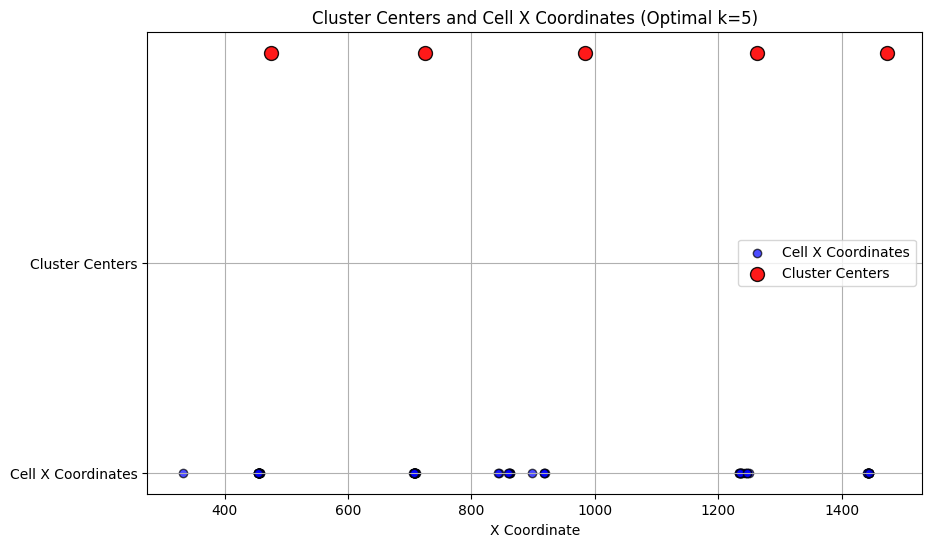

Table saved to table.xlsx


In [35]:
!pip install xlsxwriter
!pip install --upgrade kneed
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from kneed import KneeLocator




def find_elbow_point(losses):
    kneedle = KneeLocator(range(2, 2 + len(losses)), losses, curve="convex", direction="decreasing")
    return kneedle.knee

def find_columns_with_kmeans(bounding_boxes, table_width, table_height):
    # Compute horizontal midpoints of bounding boxes
    x_midpoints = np.array([(xyxy_bounding_box[2] + xyxy_bounding_box[0]) / 2 for xyxy_bounding_box in bounding_boxes]).reshape(-1,1)



    losses = []
    for k in range(2, 20):
        # Initialize evenly spaced cluster centers
        x_centers = np.linspace(table_width / (2 * k), table_width - table_width / (2 * k), k).reshape(-1,1)



        # Perform clustering
        kmeans = KMeans(n_clusters=k, init=x_centers, n_init=1, algorithm="elkan").fit(x_midpoints)
        losses.append(kmeans.inertia_)


    # Check for the elbow point
    optimal_k= find_elbow_point(losses)

    kmeans = KMeans(n_clusters=optimal_k, algorithm="elkan").fit(x_midpoints)


   # Plot the first x-coordinates and cluster centers
    plt.figure(figsize=(10, 6))
    x_coordinates = np.array([bbox[0] for bbox in bounding_boxes]).reshape(-1, 1)

    # Plot all cell x-coordinates
    plt.scatter(x_coordinates, [1] * len(x_coordinates), c="blue", label="Cell X Coordinates", alpha=0.7, edgecolor="black")

    # Plot cluster centers for the optimal k
    plt.scatter(kmeans.cluster_centers_, [2] * len(kmeans.cluster_centers_), c="red", label="Cluster Centers", s=100, alpha=0.9, edgecolor="black")

    plt.title(f"Cluster Centers and Cell X Coordinates (Optimal k={optimal_k})")
    plt.xlabel("X Coordinate")
    plt.yticks([1, 2], ["Cell X Coordinates", "Cluster Centers"])
    plt.legend()
    plt.grid(True)
    plt.show()


    return kmeans.labels_


def match_ocr_to_columns(ocr_results, bounding_boxes, cluster_labels):
    columns = {i: [] for i in range(len(set(cluster_labels)))}

    for idx, ocr_cell in enumerate(ocr_results):
        cluster = cluster_labels[idx]
        if cluster != -1:

            columns[cluster].append(ocr_cell[1])

    return columns


def save_columns_as_table(columns, output_file="table.xlsx"):
    """
    Saves the detected columns into a tabular Excel format with rows and columns.

    Parameters:
    - columns: Dictionary where keys are column indices, and values are lists of cell texts.
    - output_file: Name of the output Excel file.
    """
    max_rows = max(len(values) for values in columns.values())
    table_data = {}

    # Normalize column lengths and create the table
    for column_idx, values in columns.items():
        table_data[f"Column {column_idx + 1}"] = values + [""] * (max_rows - len(values))

    # Save as a DataFrame
    df = pd.DataFrame(table_data)
    df.to_excel("/content/drive/MyDrive/excell_output.xlsx", index=False,engine='openpyxl')
    print(f"Table saved to {output_file}")

# Process Steps
bounding_boxes = [table_cells for table_cells in cells_xyxy_for_each_table[0]]
table_width = tables_xyxy[0][2] - tables_xyxy[0][0]
table_height = tables_xyxy[0][1] - tables_xyxy[0][3]


cluster_labels = find_columns_with_kmeans(bounding_boxes, table_width,table_height)
if cluster_labels is not None:
    columns = match_ocr_to_columns(ocr_results, bounding_boxes, cluster_labels)
    save_columns_as_table(columns)
else:
    print("Cluster labels not found.")


